In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 27
n_successful_steps 27

integration complete


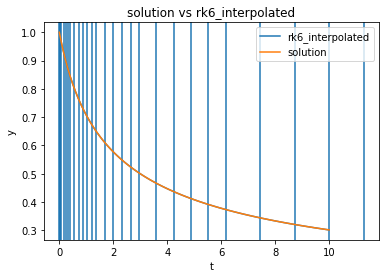

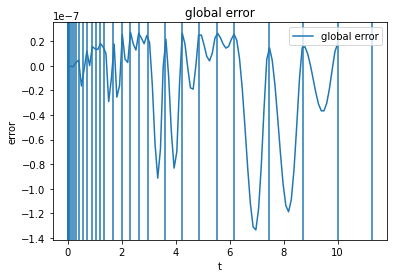

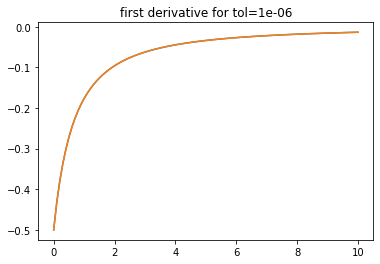

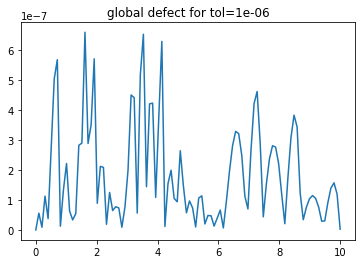

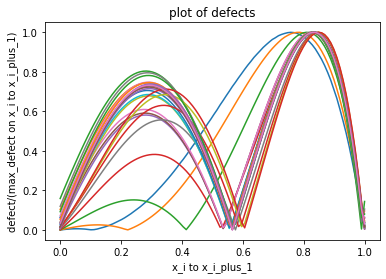

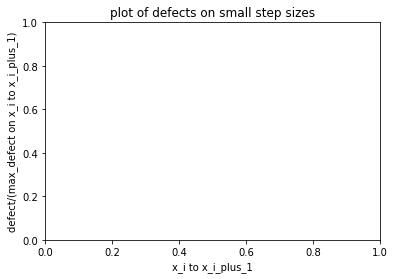

0.0
0.0
1.7030821197749901e-13
4.901523631417604e-12
1.1872092198217388e-10
2.1053596643838546e-09
3.3418889877623315e-09
4.0925234312538805e-09
4.525407826250216e-09
1.2029723217565902e-08
1.5988104395958658e-08
1.7801871088352073e-08
1.8369909482451874e-08
1.8232854559485645e-08
1.7709834820855974e-08
2.3393586956466095e-08
2.6367547811823044e-08
2.7221121134957116e-08
2.6821914134167457e-08
2.576635793616333e-08
2.4354351091382398e-08
2.638875912230887e-08
2.7183431894339805e-08
2.6753904813769935e-08
2.5612046983258807e-08
1.5351964754994896e-08
1.6609064235062476e-08
1.7981409805578608e-08
1.830648876932628e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967, 1.9999999999999973, 0.5000000000000007, 1.0000000000000029, 0.9999999999999972, 0.9999999999999987]
n_steps 87
n_successful_steps 74

integration complete


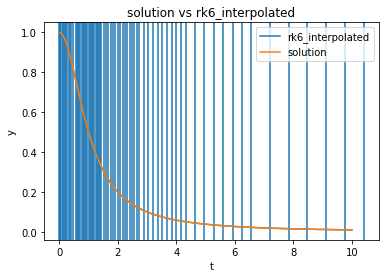

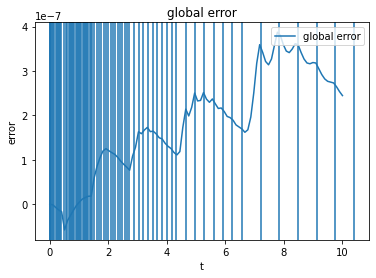

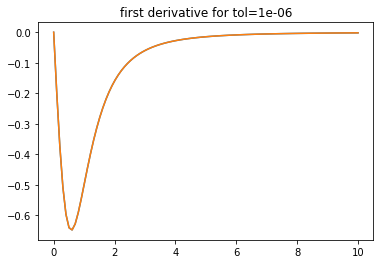

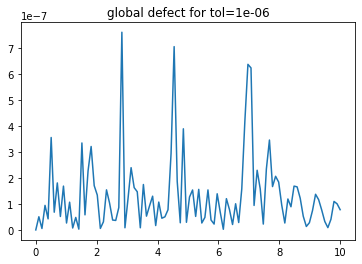

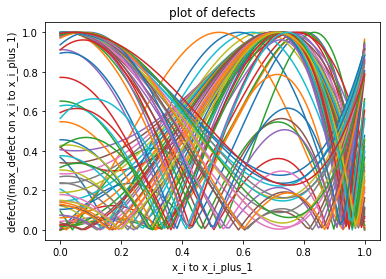

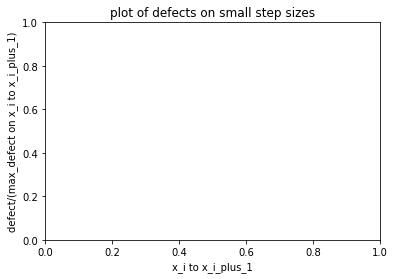

0.0
0.0
2.4991120284312274e-13
1.6223355991940025e-11
1.0332492639264501e-09
2.6518951479204134e-09
4.741393055951448e-09
7.125089074300206e-09
9.598461025994709e-09
1.1949791378640384e-08
1.398068882885184e-08
1.55237948051834e-08
1.6455635409862168e-08
5.280155446207857e-08
4.114528984189292e-08
3.701342543571684e-08
3.254562253030002e-08
2.7870768137816526e-08
2.3113121083717658e-08
1.8385907352147512e-08
1.3787051722502497e-08
9.396880162881871e-09
5.277481673893192e-09
1.4733402275979302e-09
1.9871481127253787e-09
5.089623944520838e-09
7.831465920205005e-09
1.0219461943350439e-08
1.2267605375981816e-08
1.3995107350783798e-08
1.542467886750387e-08
1.6581097550538715e-08
1.7490050796542533e-08
1.8177234606397974e-08
1.8667677459394127e-08
1.898525564536513e-08
1.915236741423243e-08
5.99692384084527e-08
8.808401530391308e-08
1.0649740184165424e-07
1.1761332691095916e-07
1.2332427451466899e-07
1.250992053836164e-07
1.2406484317661892e-07
1.210763273529203e-07
1.1677624386918772e-07
1.

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972]
n_steps 40
n_successful_steps 36

integration complete


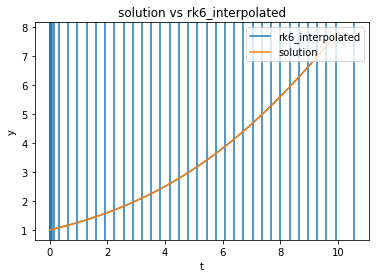

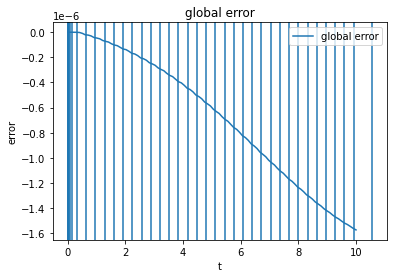

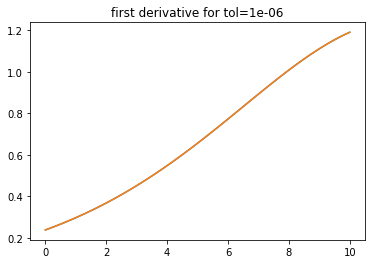

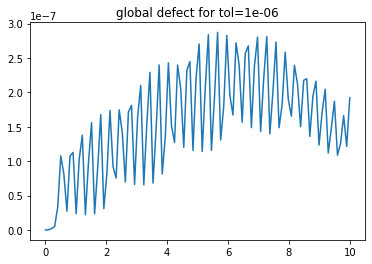

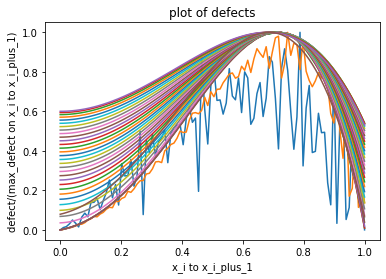

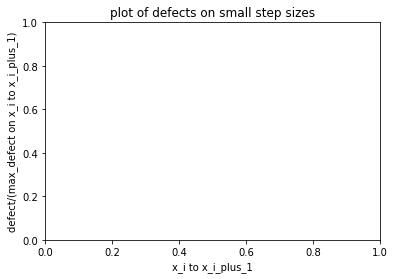

0.0
0.0
4.440892098500626e-16
1.9761969838327786e-14
6.368239269249898e-13
2.0509371978505442e-11
6.650360262483446e-10
2.1832756491591e-08
4.557289878803772e-08
7.202859286792318e-08
1.0133285921476443e-07
1.3360503281489855e-07
1.68946863610131e-07
2.0743833917258314e-07
2.491332962151205e-07
2.940549119756497e-07
3.421911900503005e-07
3.9349057701087986e-07
4.4785786856849086e-07
5.051505866937589e-07
5.651760144331774e-07
6.276890958112347e-07
6.923913860035213e-07
7.589312494005185e-07
8.269054490028793e-07
8.958622661481286e-07
9.653062020831271e-07
1.034704297353528e-06
1.1034939886300776e-06
1.1710924123775612e-06
1.2369069111173303e-06
1.3003465273442316e-06
1.3608341111748246e-06
1.4178187122126928e-06
1.4707878088771054e-06
1.5192789986073763e-06
1.562890670214756e-06
1.985326560927092e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.000000000000011, 1.0000000000000444, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 4081
n_successful_steps 3918

integration complete


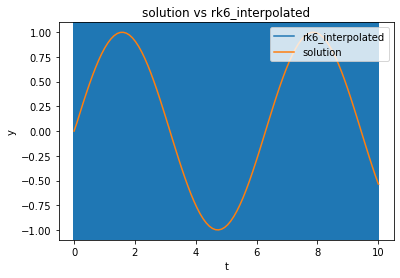

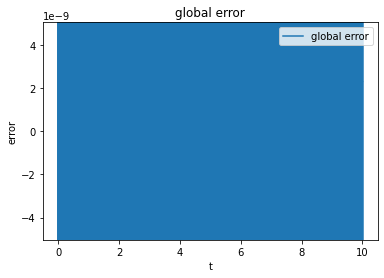

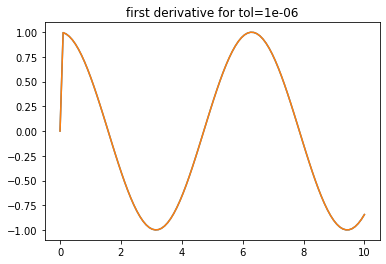

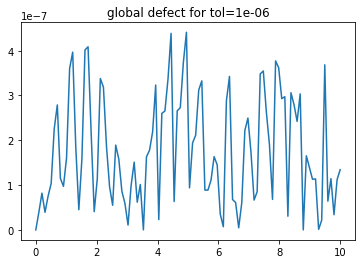

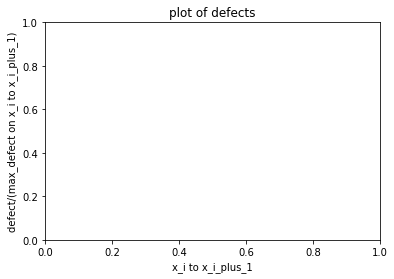

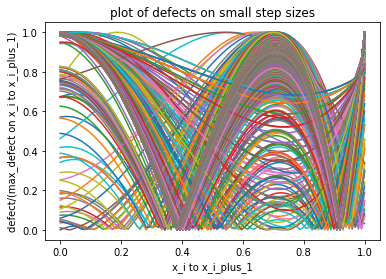

0.0
0.0
2.8928275573603113e-11
5.4350370558287064e-11
7.658491982948101e-11
9.592481062942193e-11
1.1263914627412941e-10
7.695901502874358e-10
1.2705339254640013e-09
1.6430579414389301e-09
1.9104204294906335e-09
2.092186885543912e-09
2.2047767622018766e-09
2.2619326568024123e-09
2.2751226944062175e-09
2.2538852919445906e-09
2.2061243248883144e-09
2.1383615468606454e-09
2.0559522695418053e-09
1.963269432442294e-09
1.863860534662143e-09
1.7605812641097174e-09
1.6557090073976433e-09
1.5510394704709718e-09
1.4479682904078306e-09
1.3475603515000767e-09
1.2506082107399674e-09
1.1576813882530068e-09
1.0691678722918319e-09
9.853088692168832e-10
1.917007268203985e-09
2.377767156780397e-09
2.5297798994516896e-09
2.486526734513106e-09
2.3263921830607437e-09
2.1026380497835007e-09
1.8506824406294697e-09
1.5933876232332445e-09
1.3448817198780105e-09
2.7549395265058507e-09
1.9358299407912227e-09
3.5920014185286675e-10
1.3161160633545776e-09
2.832356169046868e-09
2.2800604321249196e-09
1.854731160322

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 2.0000000000000004, 0.9999999999999997, 0.5000000000000002, 0.5, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007, 2.0, 2.0000000000000444, 1.0000000000000444, 1.9999999999996447, 2.0000000000007105, 0.5000000000000056, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.4999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 2382
n_successful_steps 1629

integration complete


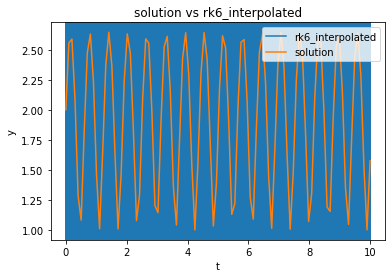

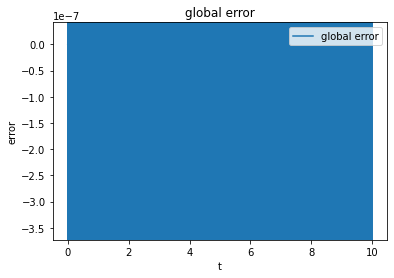

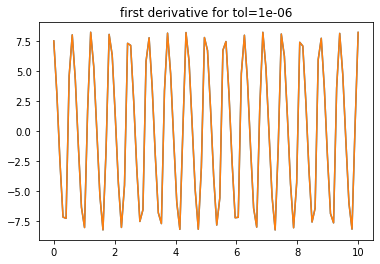

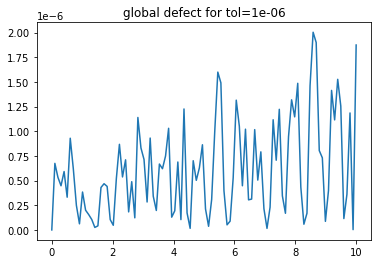

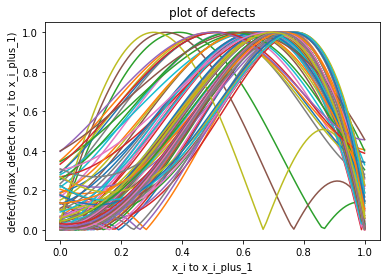

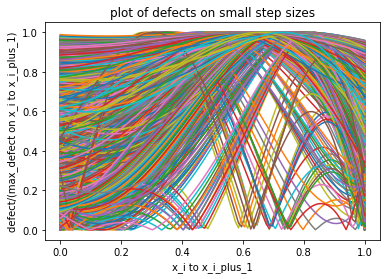

0.0
0.0
1.9200951939524202e-10
3.8491787535122057e-10
5.777125444694775e-10
7.694378467704155e-10
9.592047156559147e-10
1.1461889215524934e-09
1.3296332923573573e-09
1.50884549299235e-09
1.6831962490471142e-09
1.852112685440943e-09
2.015076105976732e-09
7.497683363055785e-09
1.243877134626814e-08
1.6801856794756986e-08
2.055804104728054e-08
2.3684745276142394e-08
2.6164691302454912e-08
2.7985114225970165e-08
2.9137175783233715e-08
2.961555267688709e-08
2.941818255663975e-08
2.8546152552877402e-08
2.700372903063908e-08
2.479852456716003e-08
2.1941815919745977e-08
1.8449028527101063e-08
1.4340408860391562e-08
9.64191393393321e-09
4.3863521703713104e-09
1.3851999547398464e-09
1.5913812489998236e-09
1.805351868000571e-09
2.0266366362875488e-09
2.2547079758794553e-09
2.4889850180898065e-09
2.7288278303672087e-09
2.9735369722061478e-09
3.22235349514699e-09
3.4744576105083524e-09
9.791329969033313e-09
1.591801046529895e-08
2.1709316566642656e-08
2.7041229033741843e-08
3.186075203664984e-08
3.

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


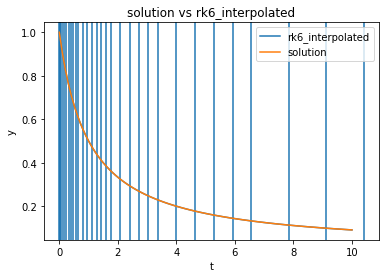

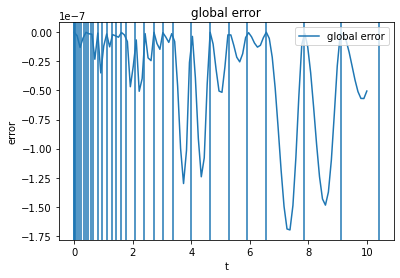

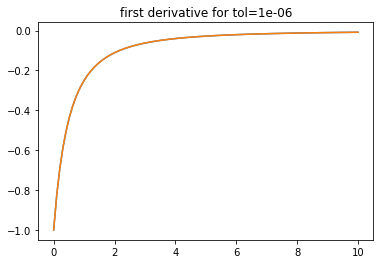

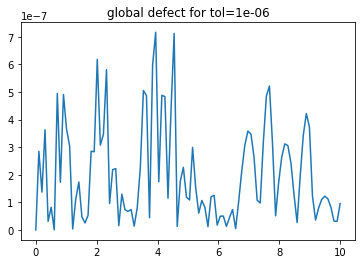

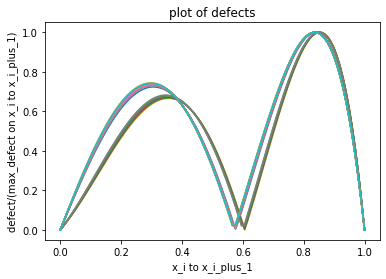

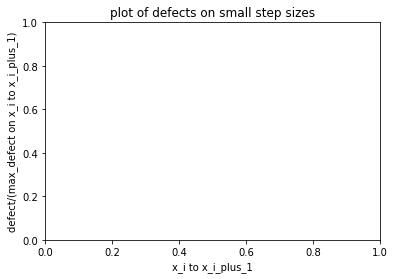

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
5.551115123125783e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 73
n_successful_steps 62

integration complete


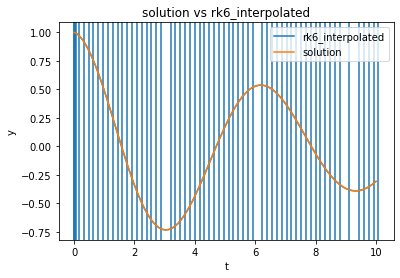

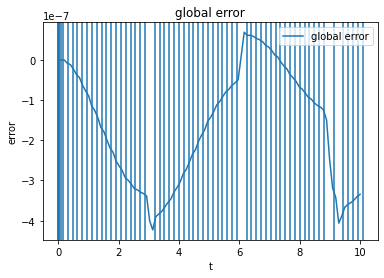

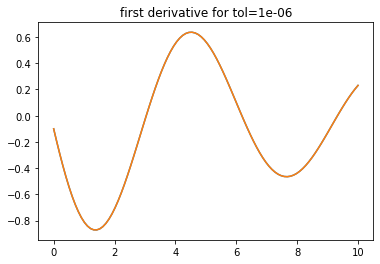

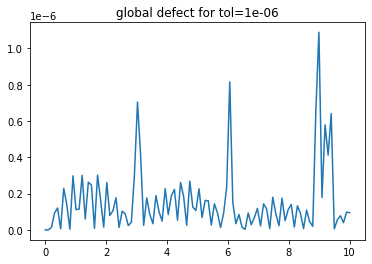

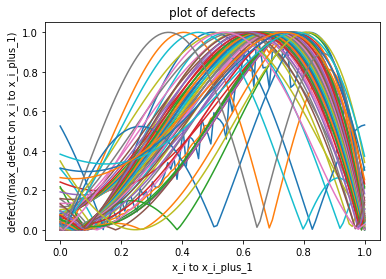

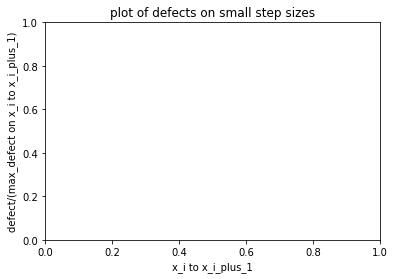

0.0
0.0
1.2212453270876722e-15
5.6066262743570405e-14
2.8617108682738035e-12
1.5854584312080533e-10
9.196520101006911e-09
2.3155815598308038e-08
4.144065113287354e-08
6.336554514430048e-08
8.81755252146732e-08
1.1506746477873975e-07
1.432119720590208e-07
1.7177525581113517e-07
1.99940415349098e-07
2.2692763107512448e-07
2.520127781457937e-07
2.74544039668978e-07
2.939561611348118e-07
3.0978205911580403e-07
3.2166157015733887e-07
3.293472109477946e-07
3.3270689558939637e-07
3.902945635569921e-07
3.8000335300658605e-07
3.65979342054068e-07
3.4860742392783806e-07
3.283467889803049e-07
3.057169024045514e-07
2.8128239437652525e-07
2.556372781514771e-07
2.2938892099699792e-07
2.0314217986927563e-07
1.7748410170020934e-07
1.529695576318879e-07
1.3010814708946938e-07
1.0935266431255641e-07
9.108937037982656e-08
7.563026210855028e-08
6.320746920307485e-08
5.3969857582991665e-08
6.054621459750109e-08
5.8493508148238504e-08
5.3510857633831677e-08
4.5841013152081445e-08
3.578693236194752e-08
2.370

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


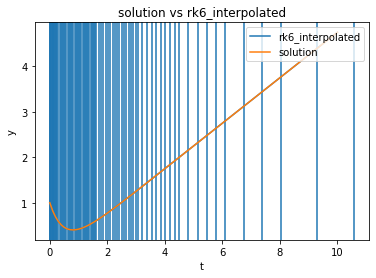

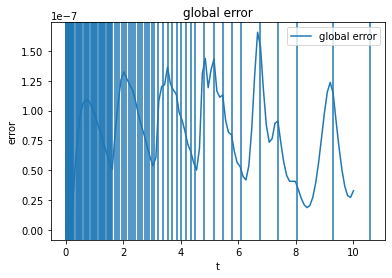

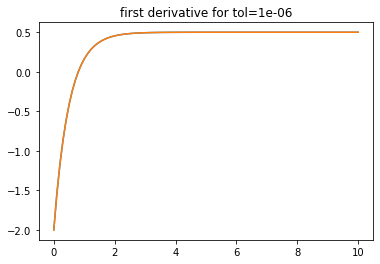

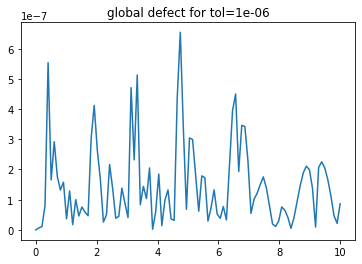

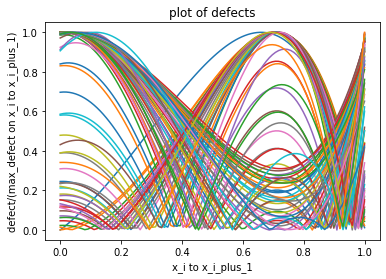

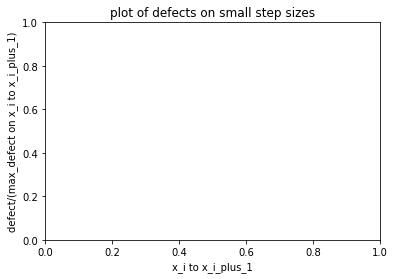

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173624718702e-08
8.353862029908399e-08
9.165733433347256e-08
9.803385120354946e-08
1.0288807317238025e-07
1.0641638736874626e-07
1.0879398121277362e-07
1.1017694168113934e-07
1.1070415656400101e-07
1.1049903675397488e-07
1.0967107499926243e-07
1.0831725644200318e-07
1.0652333487515264e-07
1.0436498620869372e-07
1.019088515241684e-07
9.921347871033603e-08
9.633017322707715e-08
9.330376560257037e-08
9.017330371285937e-08
8.697267706025968e-08
8.373117921234297e-08
8.047401400812504e-08
7.722275130461753e-08
7.399573698219086e-08
7.08084609835069e-08
6.767388793793572e-08
6.460275403519233e-08
6.160383347886267e-08
5.868417574106388e-08
5.584931972446583e-08
5.31034842

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)